In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Solving First Order Differential Equations using Monte Carlo Integration

## Introduction

given the differential equation, where $x: [0, \infty) \rightarrow \mathbb{R}$ and $f \in C^{1}(\mathbb{R} \times [0, \infty))$:
$$ \frac{dx}{dt} = f(x(t), t)$$
and IVP $x(t_0) = x_0$

### Test Functions

In [3]:
## Example f
def f(x, t):
    return 10*x

### Monte Carlo Integration implementation

Solution takes to form
$$ x(t) = x_{0} + \int^{t}_{t_0}{f(x(s), s)}ds$$

For an iterative time step $\Delta t = t_{i} - t_{i-1}$, then 
$$ x(t_{i}) = x(t_{i-1}) + \int^{t_{i}}_{t_{i-1}}{f(x(s), s)}ds$$

Therefor, the integral part of this iterative scheme can be solved Numerically using a Monte Carlo Method. Since $x(t)$ is an unknown, solving this integral would need to be approximated, by the following:
$$ \int^{t_{i}}_{t_{i-1}}{f(x(s), s)}ds \approx \int^{t_{i}}_{t_{i-1}}{f(x(t_{i-1}), s)}ds$$

By doing this the integral is strictly time dependent. If $\Delta t$ was to tend towards zero then this approximation will become more accurate, since the range of $x$ at $t_{i-1}$ would become small.

By the Mean Value Theorem, $$\int^{t_{i}}_{t_{i-1}}{f(x(t_{i-1}), s)}ds = \mathbb{E}[f(x(t_{i-1}), t)] \Delta t  $$

With this we can assign $t_k$ as a random varable such that,
$$ t_k \sim \mathfrak{Uniform}(t_{i-1}, t_{i})$$

Then expectation Value for $n$ samples of $t$ is given by
$$ \mathbb{E}[f(x(t_{i-1}), t)] = \frac{1}{n}\sum^{n}_{k=0}{f(x(t_{i-1}), t_{k})}$$

## Euler Integration

Euler's Method or Euler Integration, is a numerical method used to numerically solve first order differential equations. By taking the Backwards Difference
$$ \frac{dx}{dt} \approx \frac{x(t_{i}) - x(t_{i-1})}{\Delta t}$$
for small $\Delta t$.

Then rearanging gives
$$ x(t_{i}) \approx x(t_{i-1}) + \frac{dx}{dt}\Delta t$$

If $\Delta t$ is small enough it is safe to say
$$ x(t_{i}) = x(t_{i-1}) + \frac{dx}{dt}\Delta t$$

Since $\frac{dx}{dt}=f(x(t), t)$, then
$$x(t_{i}) = x(t_{i-1}) + f(x(t), t)\Delta t$$

Thus, yields Euler's Method.

## The Algorithm

<Figure size 640x480 with 0 Axes>

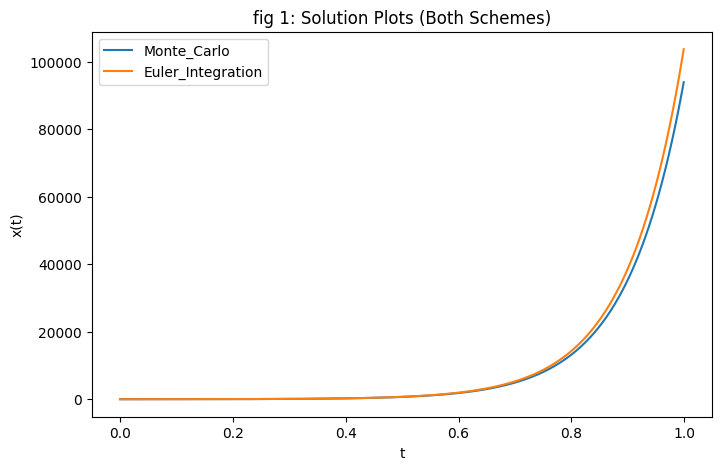

In [4]:
## Time step size and number of steps
N = 1000
dt = (1 - 0)/N

## Arrays
t = np.arange(0, 1, dt)
x = np.zeros(N)
xtrue = np.zeros(N)


## IVs
x[0] = 5
xtrue[0] = 5

## Expectation function with inputs f and number of sample values n:
n = 100
def expectation(f, n, xi, tf, ts):
    expv = np.zeros(n)
    trand = np.random.uniform(tf, ts, size=n)
    for k in range(1, n):
        expv[k] = expv[k-1] + (1/n)*f(xi, trand[k-1]) 
    return expv[n-1]

## Monte Carlo Method
for i in range(1, N):
    xi = x[i-1]
    tf = t[i-1]
    ts = t[i]
    x[i] = x[i-1] + expectation(f, n, xi, tf, ts)*dt

## Euler Integration Method
for j in range(1, N):
    xitrue = xtrue[j-1]
    ti = t[j-1]
    xtrue[j] = xitrue + f(xitrue, ti)*dt

## Plotting both Methods
plt.figure(0)
ax = plt.subplots(figsize=(8,5))
plt.title('fig 1: Solution Plots (Both Schemes)')
Monte_Carlo = plt.plot(t, x)
Euler_Integration = plt.plot(t, xtrue)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Monte_Carlo', 'Euler_Integration'])
plt.show()


## Pointwise Error

### Pointwise Error of the two methods

Calculating the pointwise error between the two methods, and plotting it in $t$.

<Figure size 640x480 with 0 Axes>

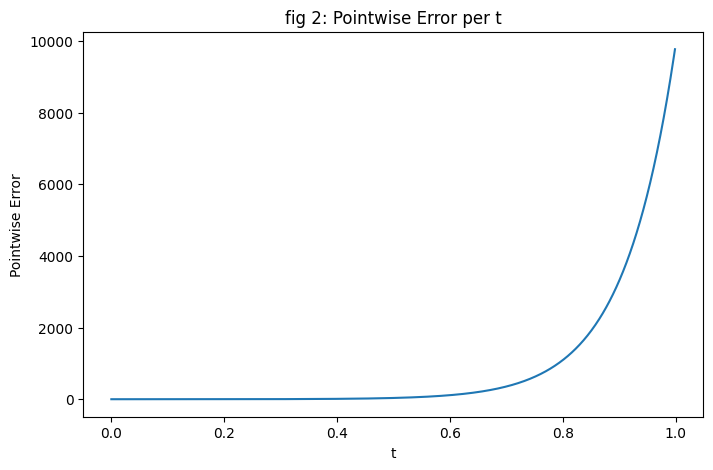

In [5]:
xerror = np.abs(x - xtrue)

plt.figure(1)
ax = plt.subplots(figsize=(8,5))
plt.plot(t, xerror)
plt.title('fig 2: Pointwise Error per t')
plt.xlabel('t')
plt.ylabel('Pointwise Error')
plt.show()

Fig 2 shows the Error of each point, between both methods. Both solutions are extremely close togethere with the lowest error (almost zero), then it diverges of to negative infinity. Therefore, the solution calculated by Euler Integration tales off much faster than the solution calculated by Monte Carlo Integration. 

In this case, one fails to account for the numerical errors of Euler Integration. Thus, one must compare both to the analytical solution. 

**NOTE:** The rounding errors are negligible.

### Pointwise Error with Anallytical Solution

In [6]:
## Analytical solution
xA = np.zeros(N)
xA[0] = 5
def xAnal(t):
    return xA[0]*np.exp(10*t)

for i in range(0, N):
    tk = t[i]
    xA[i] = xAnal(tk)

Fig 3 Shows all plots (Monte Carlo, Euler and Analytical Solutions).

<Figure size 640x480 with 0 Axes>

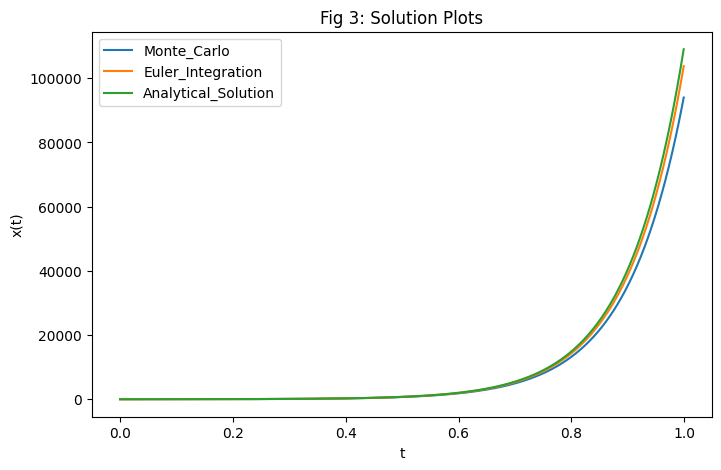

In [7]:

plt.figure(2)
ax = plt.subplots(figsize=(8,5))
plt.title('Fig 3: Solution Plots')
plt.plot(t, x)
plt.plot(t, xtrue)
plt.plot(t, xA)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Monte_Carlo', 'Euler_Integration', 'Analytical_Solution'])
plt.show()

### Pointwise Error between the Analytical and both Methods. 

Calculating the Pointwise Error between the Analytical Solution and both, Monte Carlo and Euler's Method Respectively. 

<Figure size 640x480 with 0 Axes>

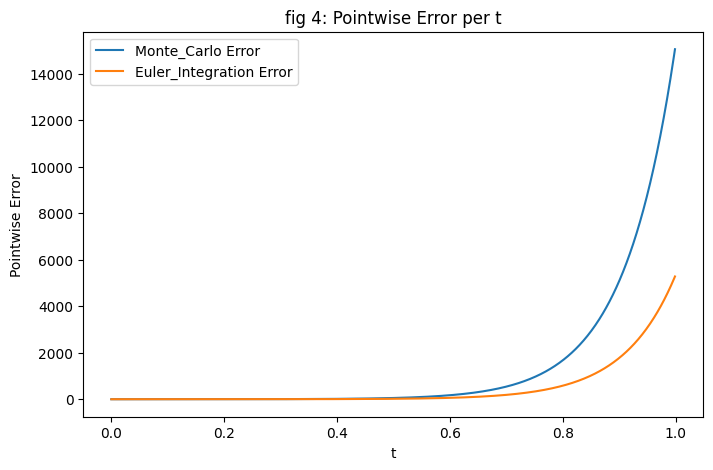

In [8]:
## Pointwise Error between Analyitcal and Monte Carlo Method
xerror_Anal_MC = np.abs(x - xA)

## Pointwise Error between Analyitcal and Euler's Method
xerror_Anal_EI = np.abs(xtrue - xA)

plt.figure(3)
ax = plt.subplots(figsize=(8,5))
plt.plot(t, xerror_Anal_MC)
plt.plot(t, xerror_Anal_EI)
plt.title('fig 4: Pointwise Error per t')
plt.xlabel('t')
plt.ylabel('Pointwise Error')
plt.legend(['Monte_Carlo Error', 'Euler_Integration Error'])
plt.show()

Fig 4 shows the pointwise errors for both Methods compared with the analytical solution. It is clear, Euler's Method diverges slower than the Monte Carlo Method. This means the Eulers will give an accurate solution for a longer time period. Therefore, the Monte Carlo Method is not the superior method. 

## Global and Relative Error

In [14]:
def Global_Error(xerror):
    return np.sqrt(xerror.dot(xerror))
 
def Relative_Error(xerror, xA):
    return (Global_Error(xerror)/(np.sqrt(xA.dot(xA))))

Relmontecarlo = Relative_Error(xerror_Anal_MC, xA)
Relanalytical = Relative_Error(xerror_Anal_EI, xA)

print(f'The relative error of the Monte Carlo Integration is {Relmontecarlo: .3f}')
print(f'The relative error of the Euler Integration is {Relanalytical: .3f}')

The relative error of the Monte Carlo Integration is  0.132
The relative error of the Euler Integration is  0.046


## Conclusion

It is clear, from above, Euler's Method is superior, since it has the lowest relative error. However, this is not to say Monte Carlo Integration is an unsuitable algorthm for solving first order ordinary differential equations. It will calculate a stable solution for most of the time domain with a low pointwise error up until $t \approx 0.65$, but for $t > 0.65$ it will become less accurate faster than Euler's Method. Therefore, Euler's Method would be a better Integration Method for simple 1 Dimensional Systems, such as the first order ordinary differential equation, seen above.

## References

1. Github.io, 2015, jotterbach.github.io/content/posts/mc_ode/2018-08-08-MonteCarloODE/. Accessed 25 May 2022.

2. Dawkins, Paul. “Differential Equations - Euler’s Method.” Tutorial.math.lamar.edu, 3 Dec. 2018, tutorial.math.lamar.edu/Classes/DE/EulersMethod.aspx. Accessed 25 May 2022